In [5]:
from KineticMechanisms import KineticMechanism
import sys
sys.path.append(r'C:\Users\timot\Desktop\GitHub\pyPostProcessor')
from pySMOKEpostprocessor import *
import matplotlib.pyplot as plt

## ROPA

In [6]:
dll = r'C:\Users\timot\Desktop\GitHub\pyPostProcessor\project\x64\Debug\pySMOKEpostprocessor.dll'
kineticFolder = "C:\\Users\\timot\\Desktop\\Example_ROPA_AMN\\TOT2110_soot_last"
outputFolder = "C:\\Users\\timot\\Desktop\\Example_ROPA_AMN\\Sun2017_RCM_AMN\\output\\Case0"

ropa = pySMOKEpostproccesor(dllpath = dll, kineticmechanismFolder=kineticFolder, simulationresultsfolder=outputFolder)

ROPA available


In [7]:
specie = "H2"

coefficients, indexes = ropa.RateOfProductionAnalysis(specie=specie, ropatype='global', numberofreactions=15)

ROPA successfully executed


In [8]:
pathkin = kineticFolder + '\\kinetics.xml'
pathname = kineticFolder + '\\reaction_names.xml'

kinetics = KineticMechanism(pathkin)
kinetics.ReadKinetics(pathname)
reactionlist = kinetics.reaction_lines
reactionprinted = []

for j in range(len(indexes)):
    for i in range(len(reactionlist)):
        if (i == (indexes[j]-1)):
            reactionprinted.append(reactionlist[i])

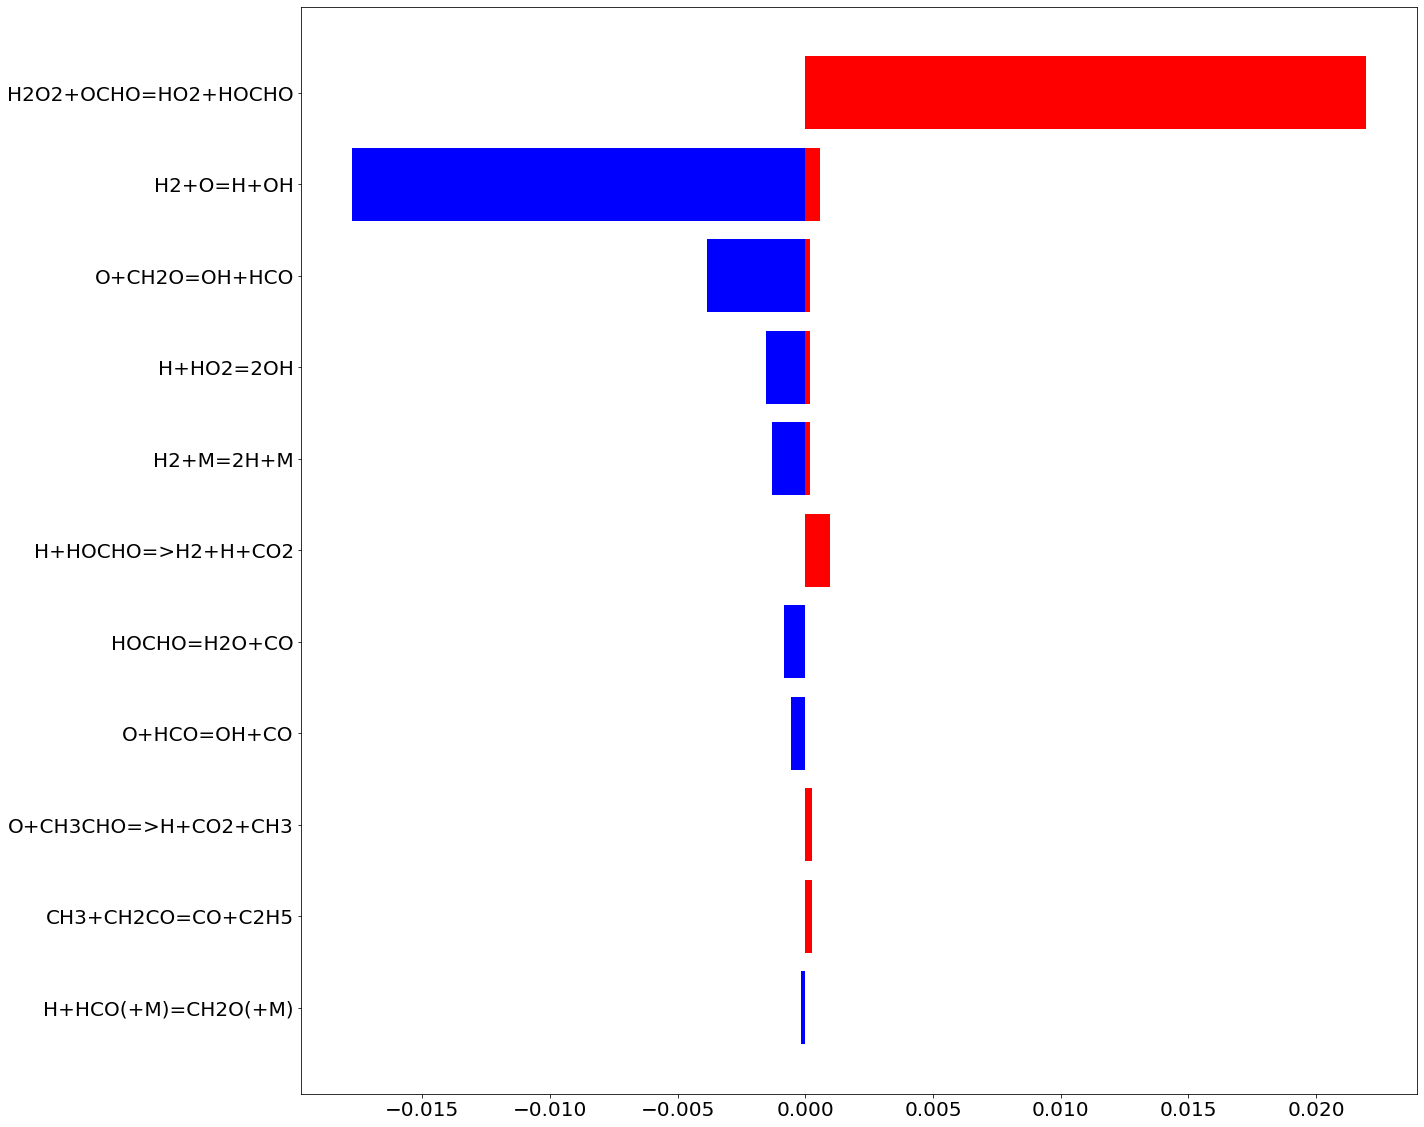

In [9]:
colori = []
for i in coefficients:
    if (i>=0):
        colori.append('red')
    else:
        colori.append('blue')

plt.rcParams["figure.figsize"]=20,20
plt.barh(reactionprinted, coefficients, color = colori)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.gca().invert_yaxis()
plt.show()

## SENSITIVITY

In [11]:
dll = r'C:\Users\timot\Desktop\GitHub\pyPostProcessor\project\x64\Debug\pySMOKEpostprocessor.dll'
kineticFolder = "C:\\Users\\timot\\Desktop\\nobili_sens\\TOT2110_PAH"
outputFolder = "C:\\Users\\timot\\Desktop\\nobili_sens\\Harris1983_C2H4\\Output_TOT2110"

sensitivity = pySMOKEpostproccesor(dllpath = dll, kineticmechanismFolder=kineticFolder, simulationresultsfolder=outputFolder)

ROPA available
Sensitivity analysis available on: C6H6  

In [12]:
specie = "C6H6"

coefficients, indexes = sensitivity.SensitivityAnalysis(specie=specie, sensitivitytype='local', orderingtype='peakvalues', 
                                          normalizationtype ='maxvalue', numberofreactions=30, sensitivitylocalvalue =0.005)


Sensitivity analysis succesfully executed


In [14]:
pathkin = kineticFolder + '\\kinetics.xml'
pathname = kineticFolder + '\\reaction_names.xml'

kinetics = KineticMechanism(pathkin)
kinetics.ReadKinetics(pathname)
reactionlist = kinetics.reaction_lines
reactionprinted = []

for j in range(len(indexes)):
    for i in range(len(reactionlist)):
        if (i == (indexes[j]-1)):
            reactionprinted.append(reactionlist[i])

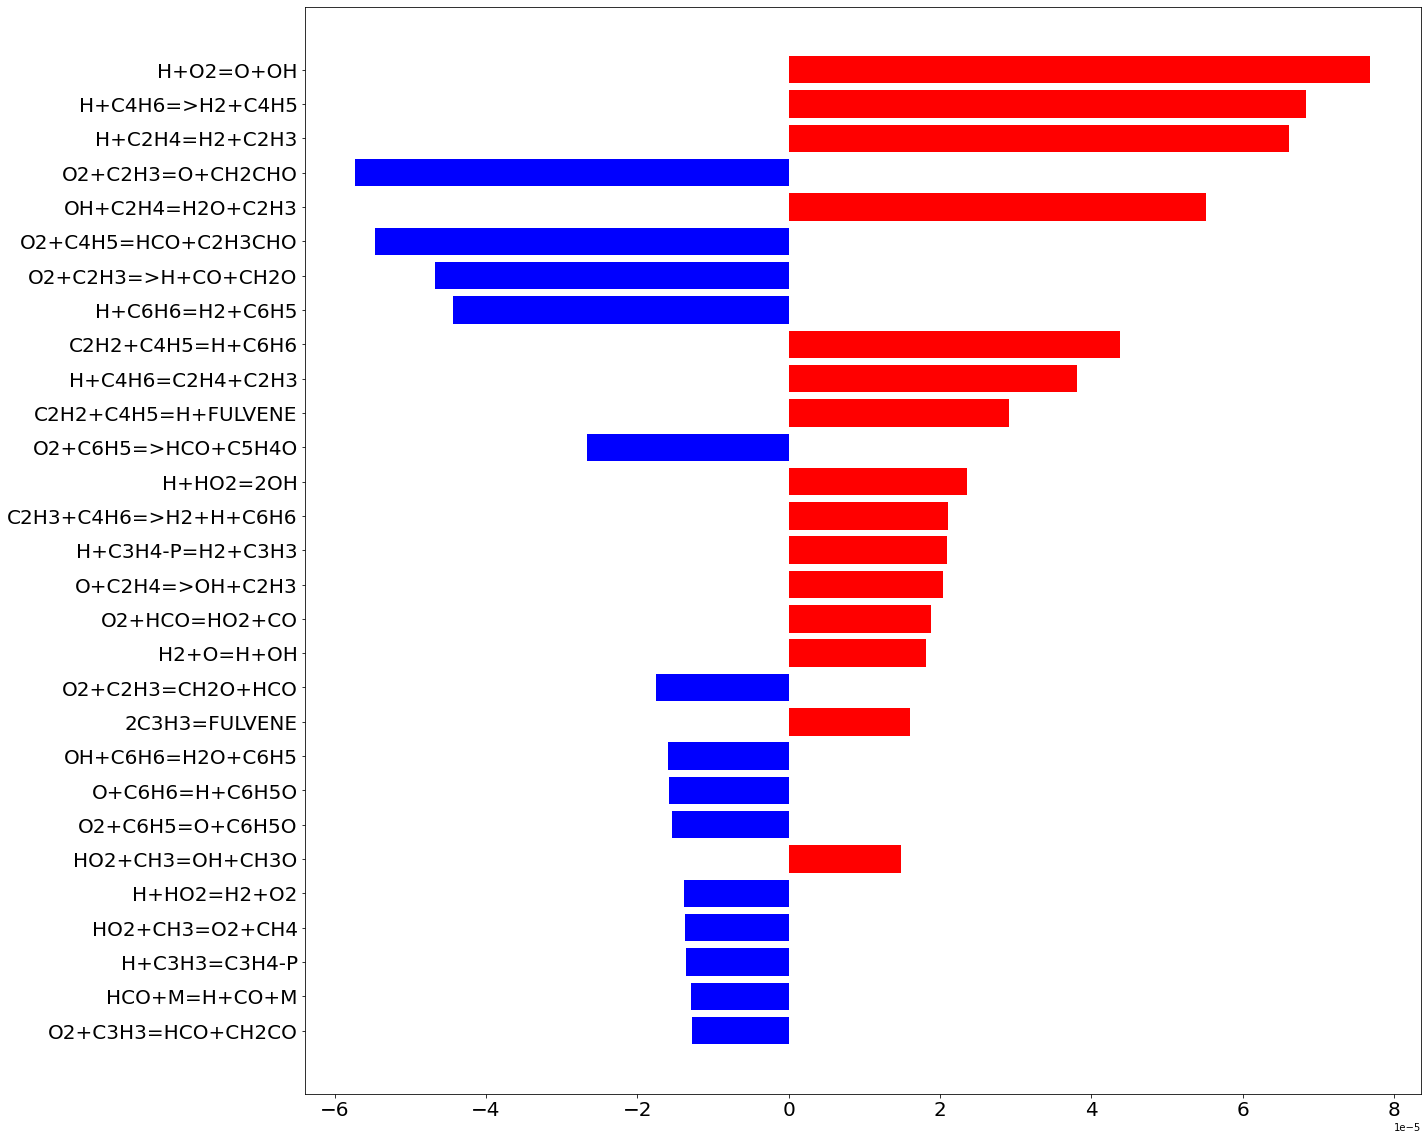

In [15]:
colori = []
for i in coefficients:
    if (i>=0):
        colori.append('red')
    else:
        colori.append('blue')
plt.rcParams["figure.figsize"]=20,20
plt.barh(reactionprinted, coefficients, color = colori)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.gca().invert_yaxis()
plt.show()